# Simulated Annealing aplicado à função Rastrigin

Este notebook aplica o algoritmo simulated annealing à função Rastrigin.

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

# Funções

In [2]:
# calculando a phi
def rastrigin(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 10.*2 + p0[0]*p0[0] + p0[1]*p0[1] - 10.*np.cos(2.*np.pi*p0[0]) - 10.*np.cos(2.*np.pi*p0[1])
    
    return phi

## Plotando a função

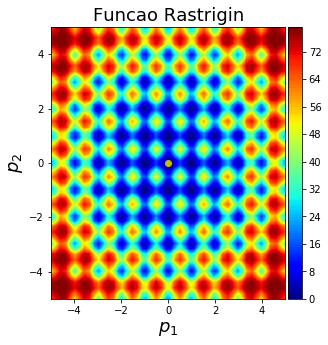

In [3]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-5., 5., np1)
p2 = np.linspace(-5., 5., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = rastrigin([p1,p2])

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.title('Funcao Rastrigin', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


In [4]:
# chute inicial
p01 = 3.
p02 = -3.

# chute inicial e temperatura inicial
p0 = np.array([p01,p02])
T = 3000.

# valor da função para o chute inicial
phi0 = rastrigin(p0)

# armazenando o chute inicial
p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

# número de iterações máximo
itmax = 1000

In [5]:
pm = p0.copy() # p melhor
phim = phi0

pmax = np.array([4.5, 4.5])
pmin = np.array([-4.5, -4.5])

for it in range(itmax):
    # copiando pm para perturbá-lo
    p = pm.copy()
    phi0 = phim
    
    # verificando se os parâmetros estão na caixa
    if p[0] > pmax[0]:
        p[0] = pmax[0]
    if p[1] > pmax[1]:
        p[1] = pmax[1]
    if p[0] < pmin[0]:
        p[0] = pmin[0]
    if p[1] < pmin[1]:
        p[1] = pmin[1]
    
    for j in range(20):
        # perturbando a solução
        rand = 2.*np.random.random(2) - 1.
        #print rand
        p_vizinho = p + rand
        #print p_vizinho
        
        # calculando a função e a variação
        phi_vizinho = rastrigin(p_vizinho)
        #print 'f_vizinho:', phi_vizinho
        delta_phi = phi_vizinho - phi0
        #print delta_phi
        
        # avaliando a função do vizinho
        if delta_phi <= 0.:
            print delta_phi
            pm = p_vizinho.copy()
            phim = phi_vizinho
            break
        elif delta_phi > 0.:
            #print delta_phi
            P = np.exp(-delta_phi/T)
            #print P
            r = np.random.random(1)
            if r <= P:
                p = p_vizinho.copy()
                                        
    print 'iteração: %3d   p1: %.2f   p2: %.2f   f: %.5e    T: %.2f' % (it, pm[0], pm[1], phim, T)
    alfa = 0.00001
    #T *= alfa
    T = T/(1. + alfa*np.sqrt(T))
    #print T

    # armazenando os resultados em listas para o plot
    phi_list.append(phim)
    p1_list.append(pm[0])
    p2_list.append(pm[1])

iteração:   0   p1: 3.00   p2: -3.00   f: 1.80000e+01    T: 3000.00
-4.47147121165
iteração:   1   p1: 1.87   p2: -2.11   f: 1.35285e+01    T: 2998.36
iteração:   2   p1: 1.87   p2: -2.11   f: 1.35285e+01    T: 2996.72
-0.300140443936
iteração:   3   p1: 2.95   p2: -1.98   f: 1.32284e+01    T: 2995.08
-2.62226270801
iteração:   4   p1: 0.20   p2: -0.14   f: 1.06061e+01    T: 2993.44
-5.93209763189
iteração:   5   p1: 0.12   p2: -0.10   f: 4.67403e+00    T: 2991.80
-3.15246923311
iteração:   6   p1: 0.09   p2: -0.02   f: 1.52156e+00    T: 2990.17
-0.413082530676
iteração:   7   p1: 0.06   p2: 0.05   f: 1.10848e+00    T: 2988.53
iteração:   8   p1: 0.06   p2: 0.05   f: 1.10848e+00    T: 2986.90
iteração:   9   p1: 0.06   p2: 0.05   f: 1.10848e+00    T: 2985.27
iteração:  10   p1: 0.06   p2: 0.05   f: 1.10848e+00    T: 2983.64
iteração:  11   p1: 0.06   p2: 0.05   f: 1.10848e+00    T: 2982.01
iteração:  12   p1: 0.06   p2: 0.05   f: 1.10848e+00    T: 2980.38
iteração:  13   p1: 0.06   p2:

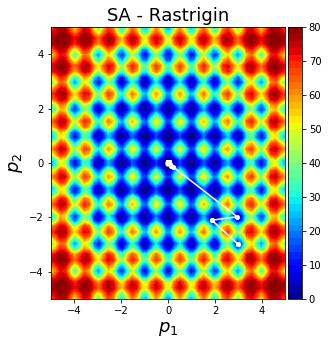

In [6]:
#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=8)
plt.title('SA - Rastrigin', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

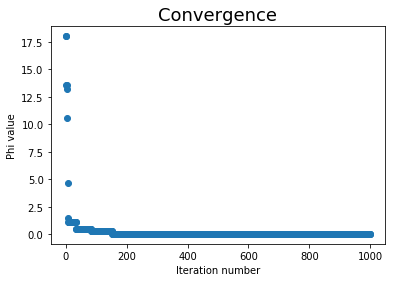

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
#plt.savefig('convergence.png', dpi=300)
plt.show()